# `snell_example_stochastic.ipynb`

### Notebook with a few examples showcasing anti-aliasing improvements with James' version of stochastic sampling. 

In [29]:
import snell
import matplotlib.pyplot as plt
import numpy as np
import tifffile

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Initialize display variables using class constructor

In [30]:
# display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)
display_stochastic = snell.snell(config = 'flat_stochastic', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)
display = snell.snell(config = 'flat', dispres = 2000, dispcm = 2, ddisp = 1, dadw = 10)

#### Create spatial lookup table for this virtual display configuration

In [31]:
display.make_display()
display_stochastic.make_display()

/home/twd/Dropbox/snell/snell_tool/snell.py:72: RuntimeWarning: invalid value encountered in arcsin
  theta_prime = np.arcsin(self.nw*np.sin(theta_)/self.na)
/home/twd/Dropbox/snell/snell_tool/snell.py:111: RuntimeWarning: invalid value encountered in true_divide
  unit_x = x_cm/d_cm
/home/twd/Dropbox/snell/snell_tool/snell.py:112: RuntimeWarning: invalid value encountered in true_divide
  unit_y = y_cm/d_cm


#### Load in and transform some example images

#### Gratings:

In [32]:
OMR_air = tifffile.imread('./examples/example_grating.tif')
OMR_snell = display.transform_image(OMR_air,smooth=False,downsample=4)
OMR_snell_stochastic = display_stochastic.transform_image(OMR_air,smooth=False,downsample=4,upsample=4)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


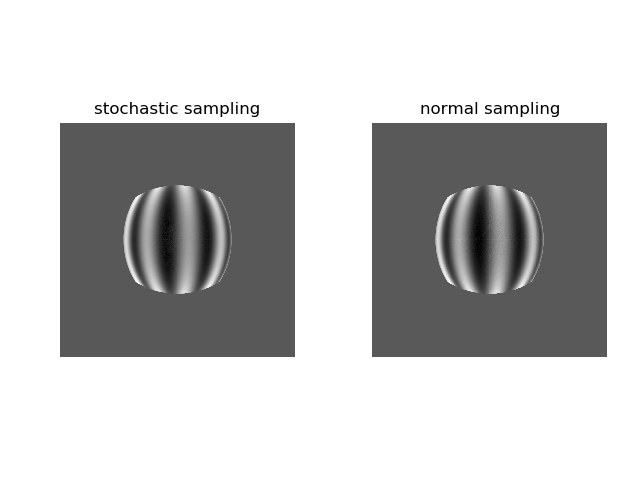

In [33]:
plt.figure()
plt.subplot(121)
plt.imshow(OMR_snell_stochastic,cmap='gray',interpolation='none')
plt.title('stochastic sampling')
plt.axis('off')
plt.subplot(122)
plt.imshow(OMR_snell,cmap='gray',interpolation='none')
plt.title('normal sampling')
plt.axis('off')
plt.tight_layout()

# Go backwards

In [14]:
display.init_inverse_transform()
display_stochastic.init_inverse_transform()

In [15]:
check_air = tifffile.imread('examples/example_check_inwindow.tif')

In [25]:
inverse = display.inverse_transform_image(check_air,smooth=False,downsample=8,upsample=8)
inverse_stochastic = display_stochastic.inverse_transform_image(check_air,smooth=False,downsample=8,upsample=8)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [27]:
check_snell = display.transform_image(inverse[:-1,:-1],smooth=False,downsample=8,upsample=8)
check_snell_stochastic = display_stochastic.transform_image(inverse_stochastic[:-1,:-1],smooth=False,downsample=8,upsample=8)

/home/twd/.conda/envs/snell/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


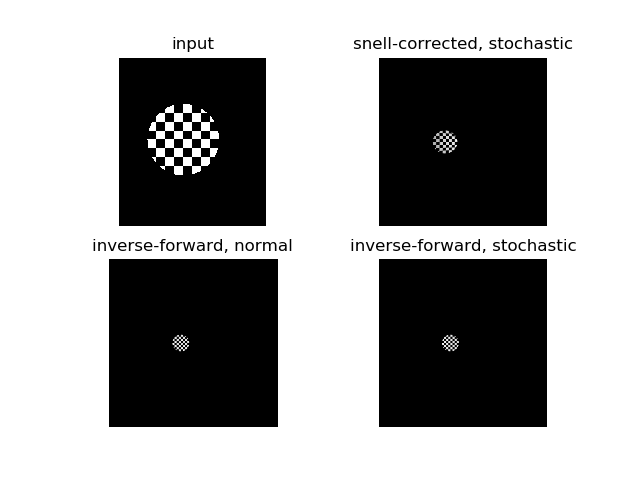

(-0.5, 3999.5, 3999.5, -0.5)

In [28]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_stochastic,cmap='gray',interpolation='none')
plt.title('snell-corrected, stochastic')
plt.axis('off')

plt.subplot(223)
plt.imshow(np.exp(check_snell),cmap='gray',interpolation='none')
plt.title('inverse-forward, normal')
plt.axis('off')

plt.subplot(224)
plt.imshow(np.exp(check_snell_stochastic),cmap='gray',interpolation='none')
plt.title('inverse-forward, stochastic')
plt.axis('off')

<IPython.core.display.Javascript object>


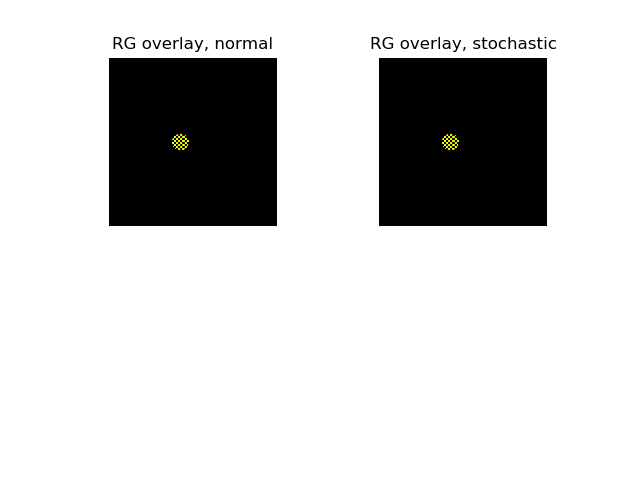

(-0.5, 3999.5, 3999.5, -0.5)

In [38]:
plt.figure()
plt.subplot(221)
rg = np.zeros((check_air.shape[0]+1,check_air.shape[1]+1,3))
rg[:-1,:-1,0] = np.exp(check_snell)/np.max(np.exp(check_snell))
rg[:-1,:-1,1] = check_air/np.max(check_air)
plt.imshow(rg,interpolation='none')
plt.title('RG overlay, normal')
plt.axis('off')


plt.subplot(222)
rg = np.zeros((check_air.shape[0]+1,check_air.shape[1]+1,3))
rg[:-1,:-1,0] = np.exp(check_snell_stochastic)/np.max(np.exp(check_snell_stochastic))
rg[:-1,:-1,1] = check_air/np.max(check_air)
plt.imshow(rg,interpolation='none')
plt.title('RG overlay, stochastic')
plt.axis('off')

# plt.subplot(223)
# plt.imshow(rg,cmap='gray',interpolation='none')
# plt.title('RG overlay')
# plt.axis('off')

<IPython.core.display.Javascript object>


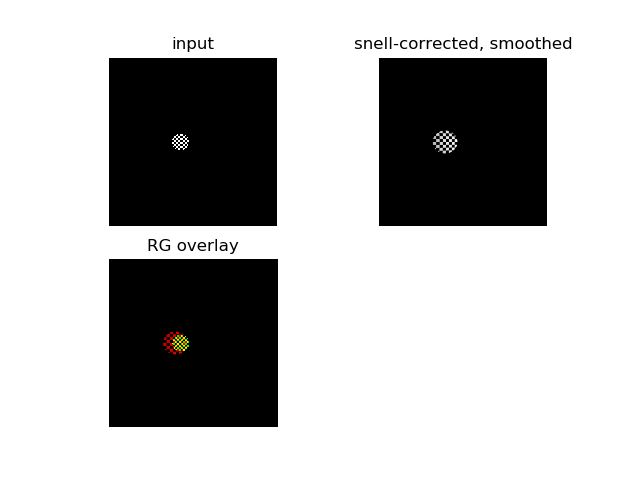

(-0.5, 3998.5, 3998.5, -0.5)

In [16]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_stochastic,cmap='gray',interpolation='none')
plt.title('snell-corrected, smoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse_stochastic/np.max(inverse_stochastic)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

<IPython.core.display.Javascript object>


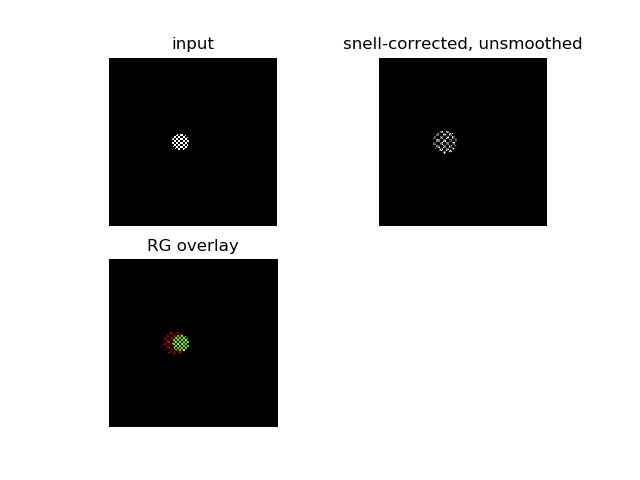

(-0.5, 3998.5, 3998.5, -0.5)

In [18]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_ns,cmap='gray',interpolation='none')
plt.title('snell-corrected, unsmoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse_ns/np.max(inverse_ns)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

<IPython.core.display.Javascript object>


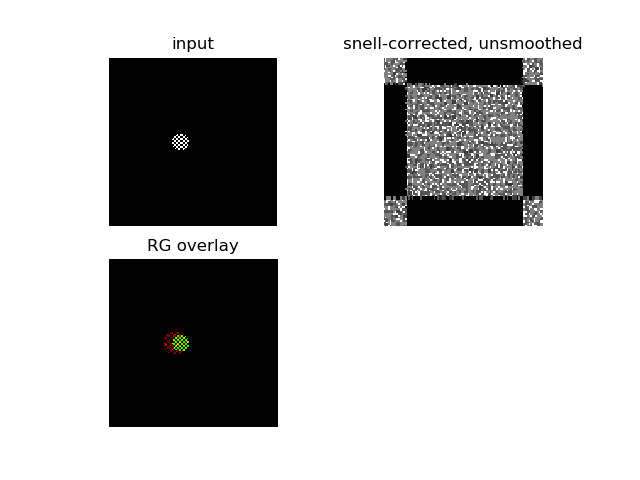

(-0.5, 3998.5, 3998.5, -0.5)

In [19]:
plt.figure()
plt.subplot(221)
plt.imshow(check_air,cmap='gray',interpolation='none')
plt.title('input')
plt.axis('off')
plt.subplot(222)
plt.imshow(inverse_stochastic_ns,cmap='gray',interpolation='none')
plt.title('snell-corrected, unsmoothed')
plt.axis('off')

rg = np.zeros((check_air.shape[0],check_air.shape[1],3))
rg[:,:,0] = inverse_stochastic_ns/np.max(inverse_ns)
rg[:,:,1] = check_air/np.max(check_air)

plt.subplot(223)
plt.imshow(rg,cmap='gray',interpolation='none')
plt.title('RG overlay')
plt.axis('off')

In [20]:
np.meshgrid(10*np.random.rand(10),10*np.random.rand(10))

[array([[0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285986 , 4.4822229 , 5.7502733 , 5.90641002,
         7.03524289, 5.58844375, 6.69810702, 0.55274426, 9.80869804],
        [0.56308391, 0.8285